In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [94]:
#the dataset includes the features like payment,old balance,amount paid name of the destination,etc
df=pd.read_csv(r"/Users/harshgoyal/Downloads/fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [95]:
# Retain the 6 features and the target variable
df=df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest',"isFraud","isFlaggedFraud"]]

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   newbalanceDest  float64
 5   isFraud         int64  
 6   isFlaggedFraud  int64  
dtypes: float64(5), int64(2)
memory usage: 339.8 MB


In [97]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [98]:
#data visualisation
o = (df.dtypes == 'object')
oc = list(o[o].index)
print("Categorical variables:", len(oc))

i = (df.dtypes == 'int')
nc = list(i[i].index)
print("Integer variables:", len(nc))

fl = (df.dtypes == 'float')
flc = list(fl[fl].index)
print("Float variables:", len(flc))


Categorical variables: 0
Integer variables: 2
Float variables: 5


In [99]:
#check null values
df.isnull().sum()

amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [100]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

<Axes: >

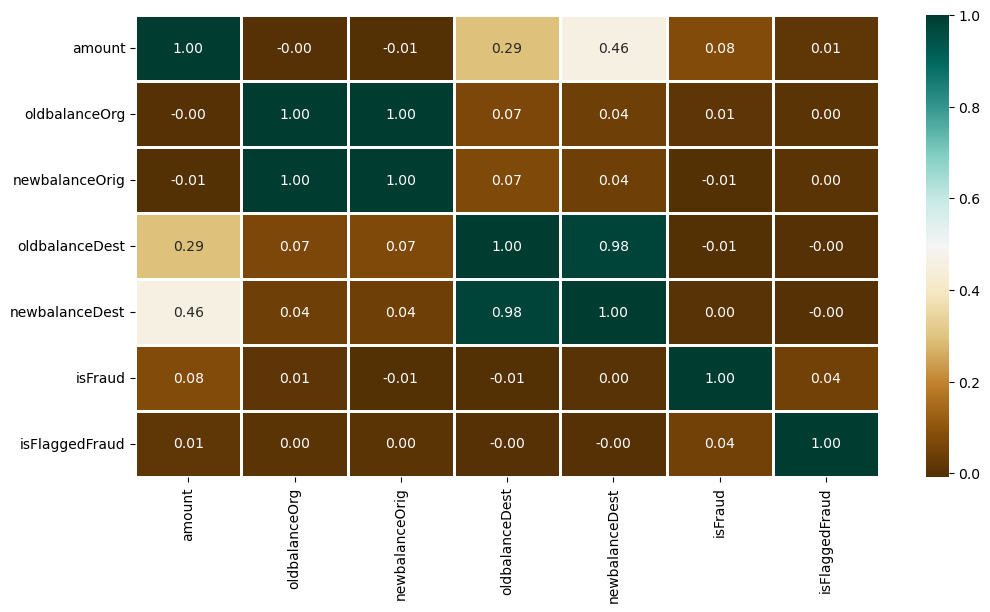

In [103]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
cmap='BrBG',
fmt='.2f',
linewidths=2,
annot=True)


In [22]:
#store the features to a variable
#x is created by simply dropping the diagnosis and retaining all others
x=df.drop('isFraud',axis=1)

#store the target variable to y
y=df['isFraud']

In [23]:
#now do the train/test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,x_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [26]:
#now train the logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(solver='liblinear')
classifier.fit(x_train,y_train)

/Users/harshgoyal/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(solver='liblinear')

In [30]:
#predicting with the test set**
y_predict = classifier.predict(x_train)

In [32]:
results=pd.DataFrame({'A':y_train,'P':y_predict})
results.head(10)

,A,P
6144590,0,0
3201282,0,0
4110413,0,0
5179672,0,0
4187011,0,0
3382843,0,0
375816,0,0
2492241,0,0
4703475,0,0
6060817,0,0


In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_predict))

0.9992803952729267


In [34]:
'''
model accuracy on training set
and get the predictions from the model for the training set
'''
y_train_pred=classifier.predict(x_train)
print(accuracy_score(y_train,y_train_pred))

0.9992803952729267


In [43]:
#now get the probablity predictions from the model.
y_test_pb=classifier.predict_proba(x_train)
print(y_test_pb.shape)

(4453834, 2)


In [44]:
y_test_pb[0:5,:]

array([[1.00000000e+000, 1.71710345e-011],
       [5.36080010e-001, 4.63919990e-001],
       [1.00000000e+000, 6.31265287e-113],
       [1.00000000e+000, 2.75501876e-014],
       [9.92835906e-001, 7.16409372e-003]])

In [45]:
#given array in scientific notation 
arr=y_test_pb[0:5,:]

#now covert it to normal format
arr_nor=np.vectorize(lambda X: format(X,'.16f'))(arr)
print(arr_nor)

[['0.9999999999828290' '0.0000000000171710']
 ['0.5360800095866226' '0.4639199904133774']
 ['1.0000000000000000' '0.0000000000000000']
 ['0.9999999999999725' '0.0000000000000276']
 ['0.9928359062752119' '0.0071640937247881']]


In [46]:
p=y_test_pb[:,1]
arr1=p

#convert it to normal form
s=np.vectorize(lambda x: format(x,'16f'))(arr1)
print(s)

['        0.000000' '        0.463920' '        0.000000' ...
 '        0.000000' '        0.430839' '        0.121553']


In [52]:
results=pd.DataFrame({'Actual':y_train,'Predictions':y_predict,'Prob(Class=1)':s})
results.head(5)

,Actual,Predictions,Prob(Class=1)
6144590,0,0,0.000000
3201282,0,0,0.463920
4110413,0,0,0.000000
5179672,0,0,0.000000
4187011,0,0,0.007164


In [53]:
#generating the confusion matrix
from sklearn.metrics import confusion_matrix as cm

m=cm(y_train,y_predict)
print(m)

[[4446748    1341]
 [   1864    3881]]


Text(108.22222222222221, 0.5, 'True Label')

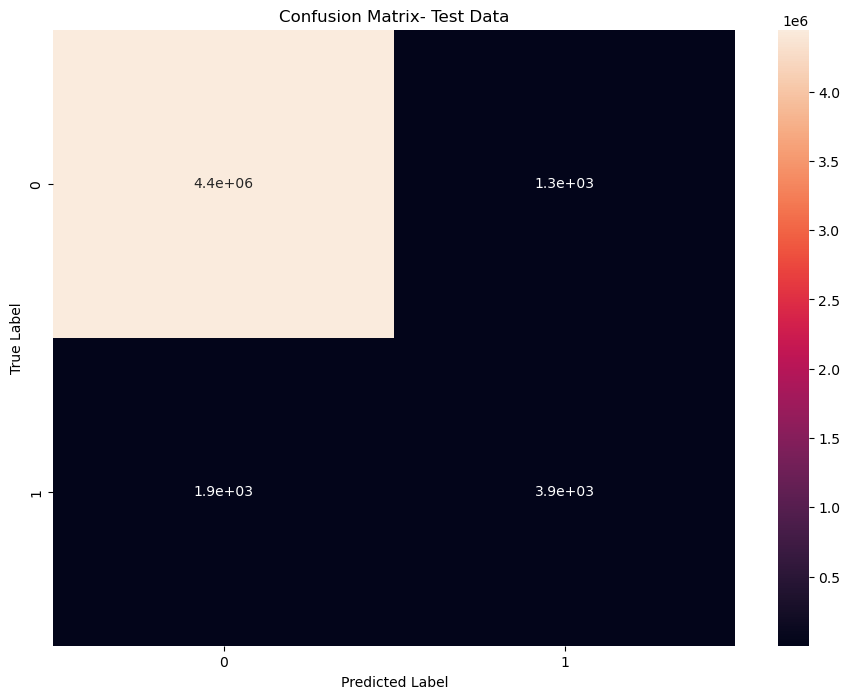

In [55]:
import seaborn as sn
plt.figure(figsize=(11,8))
sn.heatmap(m,annot=True)
plt.title('Confusion Matrix- Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

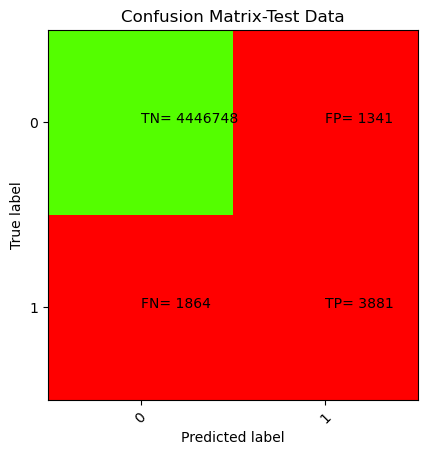

In [61]:
plt.clf()
plt.imshow(m,interpolation='nearest',cmap=plt.cm.prism)
classNames=['0','1']
plt.title('Confusion Matrix-Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks=np.arange(2)
plt.xticks(tick_marks,classNames,rotation=45)
plt.yticks(tick_marks,classNames)
S=[['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(S[i][j])+"= "+str(m[i][j]))
plt.show()        

In [64]:
#now we have to calculate common error metrics for 2-class classifier
from sklearn.metrics import classification_report as cr
print(cr(y_train,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4448089
           1       0.74      0.68      0.71      5745

    accuracy                           1.00   4453834
   macro avg       0.87      0.84      0.85   4453834
weighted avg       1.00      1.00      1.00   4453834



In [65]:
#now we have to calculate the metrics values
TN=m[0][0]
FP=m[0][1]
FN=m[1][0]
TP=m[1][1]

In [73]:
re=TP/(TP+FN)
print("Recall= ",re)

Recall=  0.675543951261967


In [74]:
pr=TP/(TP+FP)
print("Precision=",pr)

Precision= 0.7432018383761011


In [75]:
sp=TN/(TN+FP)
print("specificity= ",sp)

specificity=  0.9996985222193171


In [76]:
ac=(TP+TN)/(TP+TN+FP+FN)
print("Accuracy= ",ac)

Accuracy=  0.9992803952729267
